In [36]:
biomarker_params = {
    "MMSE": {"theta_mean": 22, "theta_std": 2.67, "phi_mean": 28, "phi_std": 0.67},
    "ADAS": {"theta_mean": 20, "theta_std": 4.00, "phi_mean": 6, "phi_std": 1.33},
    "AB": {"theta_mean": 150, "theta_std": 16.67, "phi_mean": 250, "phi_std": 50.00},
    "P-Tau": {"theta_mean": 50, "theta_std": 33.33, "phi_mean": 25, "phi_std": 16.67},
    "HIP-FCI": {"theta_mean": 5, "theta_std": 6.67, "phi_mean": -5, "phi_std": 1.67},
    "HIP-GMI": {"theta_mean": 0.3, "theta_std": 0.33, "phi_mean": 0.4, "phi_std": 0.23},
    "AVLT-Sum": {"theta_mean": 20, "theta_std": 6.67, "phi_mean": 40, "phi_std": 15.00},
    "PCC-FCI": {"theta_mean": 5, "theta_std": 3.33, "phi_mean": 12, "phi_std": 4.00},
    "FUS-GMI": {"theta_mean": 0.5, "theta_std": 0.07, "phi_mean": 0.6, "phi_std": 0.07},
    "FUS-FCI": {"theta_mean": 20, "theta_std": 6.00, "phi_mean": 10, "phi_std": 3.33}
}

import matplotlib.pyplot as plt
import numpy as np
cmap = plt.get_cmap("tab10")
plt.rcParams['font.family'] = 'Helvetica'


In [37]:
def plot_idealized_transition(experiment_num:int, biomarker_params=biomarker_params):
    rng = np.random.default_rng(seed=42)
    n_biomarkers = len(biomarker_params)

    assert experiment_num in [5,7,9], "experiment_num must be among 5, 6, 7, and 8"

    kj_range = np.linspace(0, n_biomarkers, 500)

    if experiment_num ==5:
        event_times = np.linspace(1, n_biomarkers + 1, n_biomarkers)
        for_experiment = "5 & 6"
    elif experiment_num ==7:
        event_times = rng.beta(a=2, b=2, size=n_biomarkers) * n_biomarkers
        for_experiment = "7 & 8"
    else:
        event_times = rng.beta(a=2, b=2, size=n_biomarkers) * n_biomarkers
        noise = rng.normal(loc=0,scale=0.05*n_biomarkers, size=n_biomarkers)
        event_times += noise 
        event_times = np.clip(event_times, 0, n_biomarkers)
        for_experiment = "9"

    # Create plot
    plt.figure(figsize=(8, 5))
    for i, (biomarker, params) in enumerate(biomarker_params.items()):
        mu_phi = params["phi_mean"]
        mu_theta = params["theta_mean"]
        sigma_phi = params["phi_std"]
        sigma_theta = params["theta_std"]

        R = mu_theta - mu_phi
        rho = max(1, abs(R) / np.sqrt(sigma_phi**2 + sigma_theta**2))
        xi_n = event_times[i]
        direction = (-1) ** rng.binomial(1, 0.5)

        x = mu_phi + direction * R / (1 + np.exp(-rho * (kj_range - xi_n)))
        x_norm = (x - x.min()) / (x.max() - x.min())

        plt.plot(kj_range, x_norm, label=biomarker, color=cmap(i % 10), linewidth=2, alpha=0.85)

    # Aesthetics
    plt.xlabel("Disease Stage", fontsize=12)
    plt.ylabel("Normalized Biomarker Value", fontsize=12)
    plt.title(f"Idealized Sigmoid Transitions for Biomarkers (Exp. {for_experiment})", fontsize=13)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Legend outside
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9, frameon=False)
    plt.subplots_adjust(right=0.78)  # Make space for legend
    plt.savefig(f"plots/idealized_experiment_{experiment_num}.pdf")
    plt.savefig(f"plots/idealized_experiment_{experiment_num}.png")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

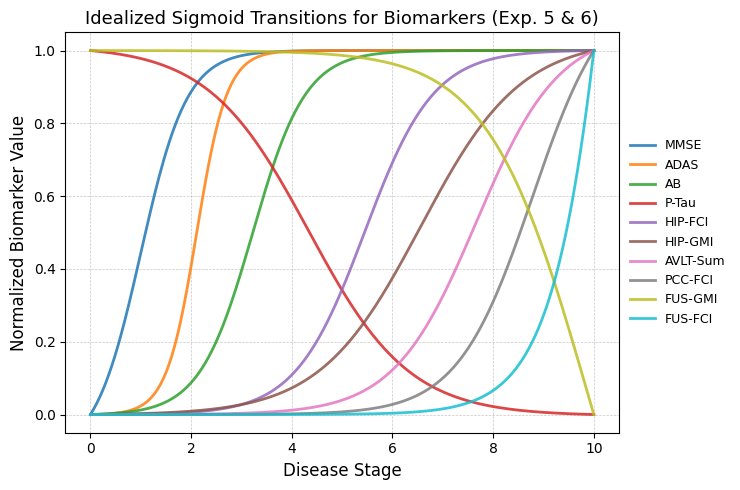

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

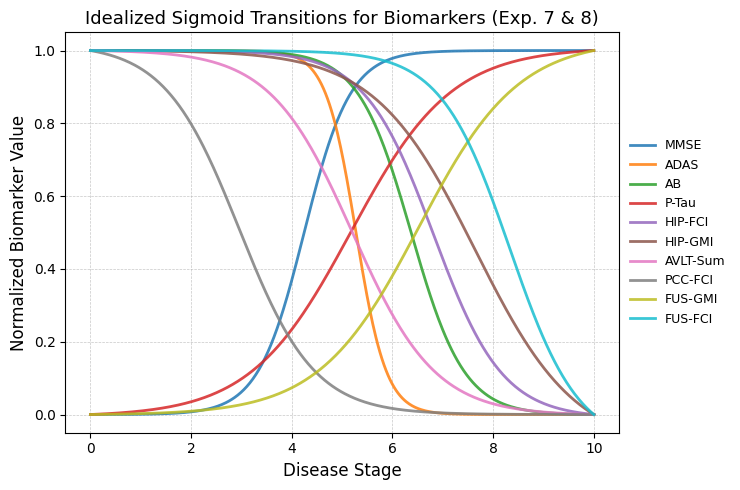

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

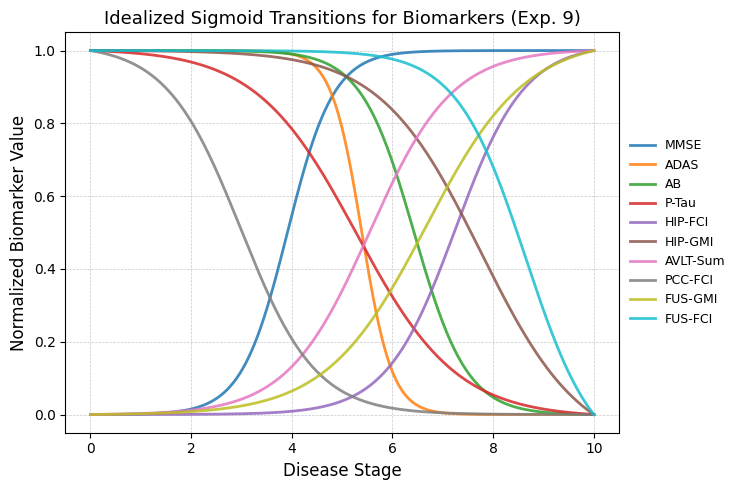

In [38]:
for i in [5,7,9]:
    plot_idealized_transition(
        experiment_num=i
    )